In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

In [3]:
from IPython.display import Image
Image(url= "iris.jpg")

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.data[:8])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
# целевая переменная
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
iris_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [10]:
# Запишем в матрицу А характеристики Ирисов из набора данных
A = iris.data

In [11]:
# Ранг матрицы
np.linalg.matrix_rank(A)

4

In [12]:
# Проведём сингулярное разложение матрицы
U, s, W = np.linalg.svd(A)
V = W.T

In [13]:
# Cингулярные числа, лежащие на главной диагонали матрицы  𝐷
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [14]:
D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = s
D[0:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46093093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.88482631]])

In [15]:
V

array([[-0.75110816,  0.2841749 ,  0.50215472,  0.32081425],
       [-0.38008617,  0.5467445 , -0.67524332, -0.31725607],
       [-0.51300886, -0.70866455, -0.05916621, -0.48074507],
       [-0.16790754, -0.34367081, -0.53701625,  0.75187165]])

In [16]:
SM = sum(s)
print(f'Вес каждого признака:\n{[round(k/SM,4) for k in s]}')

Вес каждого признака:
[0.8059, 0.1492, 0.0291, 0.0158]


In [17]:
# Т.к. вес двух последних признаков менее 4.5%, попробуем избавиться от них
s2 = s.copy()
s2[-2:] = 0
s2

array([95.95991387, 17.76103366,  0.        ,  0.        ])

In [19]:
# Сформируем новую D-матрицу с двумя оставшимися признакамии и получим матрицу A2
D2 = np.zeros_like(A, dtype=float)
D2[np.diag_indices(min(A.shape))] = s2
A2 = U @ D2 @ W

In [20]:
# Ранг новой матрицы
np.linalg.matrix_rank(A2)

2

In [21]:
A2[0:10]

array([[5.0952927 , 3.50597743, 1.40192232, 0.20165319],
       [4.74588049, 3.19610853, 1.46136967, 0.25800276],
       [4.68667405, 3.21586325, 1.30954904, 0.19452725],
       [4.61488457, 3.08894388, 1.46347879, 0.27002699],
       [5.07488651, 3.50623125, 1.36428119, 0.1863997 ],
       [5.52598407, 3.7330351 , 1.67566825, 0.28872322],
       [4.731593  , 3.2288014 , 1.36216771, 0.21446447],
       [5.00510918, 3.39830515, 1.47931372, 0.24418439],
       [4.37933538, 2.93134058, 1.38864652, 0.25618379],
       [4.80551481, 3.23360903, 1.48569239, 0.26393296]])

In [22]:
# V - матрица перехода к новому базису, AN - новая А-матрица после перехода к новому базису
AP = np.dot(A2, V)
AN = np.delete(AP, [2, 3], axis=1)
AN[0:10]

array([[-5.91274714,  2.30203322],
       [-5.57248242,  1.97182599],
       [-5.44697714,  2.09520636],
       [-5.43645948,  1.87038151],
       [-5.87564494,  2.32829018],
       [-6.47759822,  2.32464996],
       [-5.5159752 ,  2.07090423],
       [-5.85092859,  2.14807482],
       [-5.15891972,  1.77506408],
       [-5.64500117,  1.99000106]])

In [23]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [24]:
# DataFrame на основе матрицы AN
df_iris = pd.DataFrame(AN, columns=iris.feature_names[:2])
df_iris['target'] = iris_frame['target']
df_iris['name'] = iris_frame['name']
df_iris

,sepal length (cm),sepal width (cm),target,name
0,-5.912747,2.302033,0,setosa
1,-5.572482,1.971826,0,setosa
2,-5.446977,2.095206,0,setosa
3,-5.436459,1.870382,0,setosa
4,-5.875645,2.328290,0,setosa
...,...,...,...,...
145,-9.226517,-0.931293,2,virginica
146,-8.566265,-1.039134,2,virginica
147,-9.025923,-0.885027,2,virginica
148,-9.105599,-0.996416,2,virginica


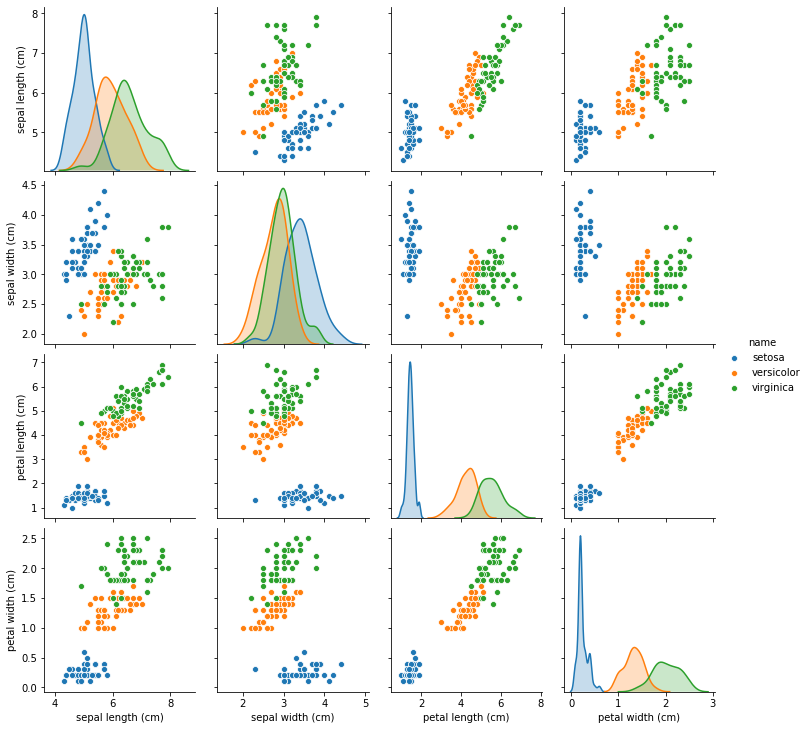

In [25]:
import seaborn as sns

# Для начального датасета
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

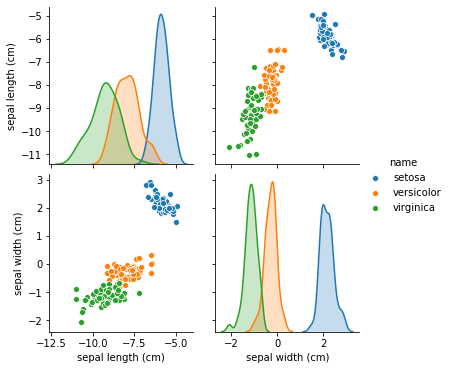

In [26]:
# Для обработанного датасета
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','name']], hue = 'name')

### Прогноз по 4-м признакам исходных данных

In [27]:
feature_names = iris_frame.columns[:-2]
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [28]:
class_column = iris_frame.columns[-2]
class_column

'target'

In [29]:
class_names = iris_frame[iris_frame.columns[-1]].unique()
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
X = iris_frame[feature_names]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y = iris_frame[class_column]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [35]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Прогноз по 2-м признакам после понижения размерности

In [36]:
feature_names = df_iris.columns[:-2]
feature_names

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

In [37]:
class_column = df_iris.columns[-2]
class_column

'target'

In [38]:
class_names = df_iris[iris_frame.columns[-1]].unique()
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
X = df_iris[feature_names]
X.head()

,sepal length (cm),sepal width (cm)
0,-5.912747,2.302033
1,-5.572482,1.971826
2,-5.446977,2.095206
3,-5.436459,1.870382
4,-5.875645,2.328290


In [40]:
y = df_iris[class_column]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [42]:
clf = clf.fit(X_train, y_train)

In [43]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9811320754716981